# COGS 118A - Project Checkpoint

### Installing dependencies and importing packages

In [41]:
import numpy as np # for matrix processing
import pandas as pd # for dataframe processing
import matplotlib.pyplot as plt # for plot
from wordcloud import WordCloud, STOPWORDS # for word cloud generator and tag cloud creator

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Jason Krentsel
- Jackie Lai
- Shantelle Serafin
- Zecheng (Justin) Li

# Abstract 

Our goal is to categorize text found within tweets as hate speech, offensive language, or being neither. The data set we are using is representative of actual tweets on twitter and are measured by crowd-sourced opinions of which category best fits each tweet. We will be using this data to train an algorithm to determine if tweets contain hate speech and/or offensive language to then determine if it would be appropriate to flag the tweet or ban the user. Performance will be measured based on accuracy of classification.

# Background

Offensive speech and hate speech is prolific on the internet, one could argue that it is more easily found there than in the real world. This abundance could be due to a number of factors, including but not limited to anonymity, invisibility, community, and instantaneousness<a name="brown"></a>[<sup>[1]</sup>](#brownnote). Because of the anonymity and real physical distance between speaker and recipient, the internet has become a place where it is safe, and sometimes even encouraged, to engage in hate culture as there are much fewer real-world repercussions. Resultantly, social media companies are facing lots of criticism and backlash from governments, causing them to be more “proactive in anticipating corrupted use of their online platforms.” <a name="ulgen"></a>[<sup>[2]</sup>](#ulgennote) However, the “constantly evolving nature of and variety of cyberhate”<a name="brown"></a>[<sup>[1]</sup>](#brownnote) makes this not only practically difficult but could potentially lead to misflagging of tweets or accounts.

# Problem Statement

The problem we are solving is the classification of Tweets into 2 or 3 different categories: hate speech, offensive language, or neither. We want to develop a machine learning model that can accurately predict a novel tweets class for possible use in automatically moderating the site. One of the more complex parts of creating such a model is turning text into quantitative data. While this is far from impossible, there are many natural language processing techniques we can utilize which can maintain varying amounts of semantic information. After tokenizing a tweet, we can use a Term Frequency-Inverse Document Frequency (TF-IDF) strategy to generate a value of how important each word is to a tweet. This is quite a powerful technique because not all offensive tweets are hateful. For example, “I f***ing love this movie” would obviously be flagged for offensive language, but the importance of the offensive word is low and could signify non-hateful meaning. On the other hand, hateful language doesn’t necessarily have to have offensive content, ex. “I think the director of this movie should never show their face in public after that terrible movie”. The main error metric we want to use is false positive rate. As this would be an automatic moderating system, we want to only allow it to ban users only when it is very sure that their tweets are offensive or hateful. We can use a more lenient system for flagging tweets for human moderation where our model might miss, but it would not be good for it to accidentally ban users that did not post malicious content. Malicious text content on the internet is arguably some of the most replicable data there can be. There is a constant flow of tweets being published, and even when they are not neatly organized in a dataset, we can always utilize Twitter’s API to scrape for more data.

# Data

- https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset
- 24784 observations, with 7 variables
- An observation consists of [count of human classifier votes, hate speech votes, offensive language votes, neither votes, final classification (plural vote), tweet text]
- The main critical variables is the final classification and the raw tweet text
- We will need to use various natural language processing techniques to turn the raw tweet text into quantifiable values. We will most likely utilize bag-of-words and Term Frequency-Inverse Document Frequency to convert this text data into numerical values.


In [5]:
df = pd.read_csv('labeled_data.csv')
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [19]:
df['class'].unique()

array([2, 1, 0])

Class label for majority of CF users:
 0 - hate speech
 1 - offensive language
 2 - neither

In [11]:
df[['tweet', 'class']]

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,"you've gone and broke the wrong heart baby, an...",2
24780,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,youu got wild bitches tellin you lies,1


In [20]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

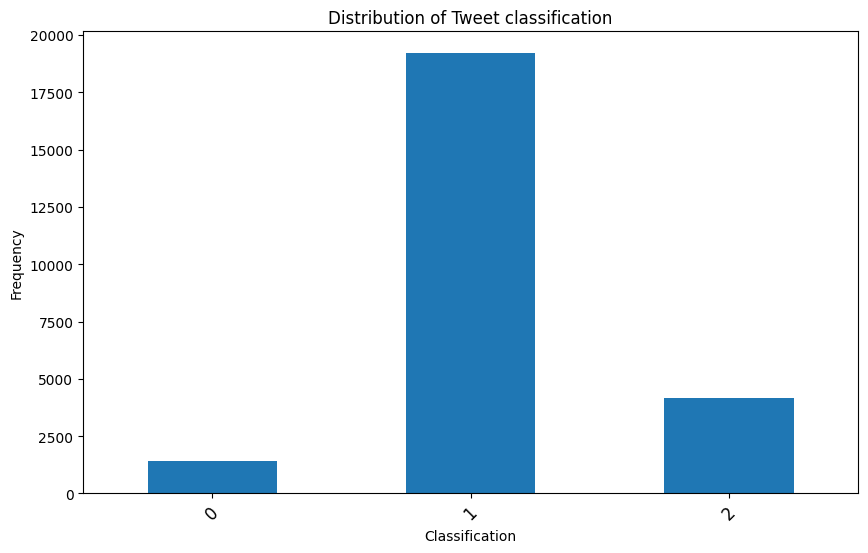

In [33]:
class_dis = df['class'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 6))
class_dis.plot(kind='bar')
plt.title('Distribution of Tweet classification')
plt.xlabel('Classification')
plt.xticks(fontsize=12, rotation=45)
plt.ylabel('Frequency')
plt.show()

### Data description
It’s important to note that the data we have has a large imbalance of tweet labels between hate speech (0), offensive language (1), and neither (2). The majority of the data is labeled 1. Thus, this may cause the model to have a bias to classify a tweet as offensive. In order to combat this challenge, we plant split the data evenly during training to ensure that the model is not biased towards one classification. Moreover, we may consider enlargement for the 0 and 2 classes.
In the cells below we generated word clouds to showcase the most common words in each class.

In [42]:
def generate_wordcloud(tweets):
    # Join all the tweets together into one long string
    long_string = ' '.join(tweets)
    # set stopwords
    stopwords = set(STOPWORDS)
    stopwords.add("RT")

    # Create a WordCloud object
    wordcloud = WordCloud(width = 800, height = 400,
                          background_color ='white',
                          stopwords = stopwords,
                          min_font_size = 10).generate(long_string)

    # Plotting the WordCloud
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

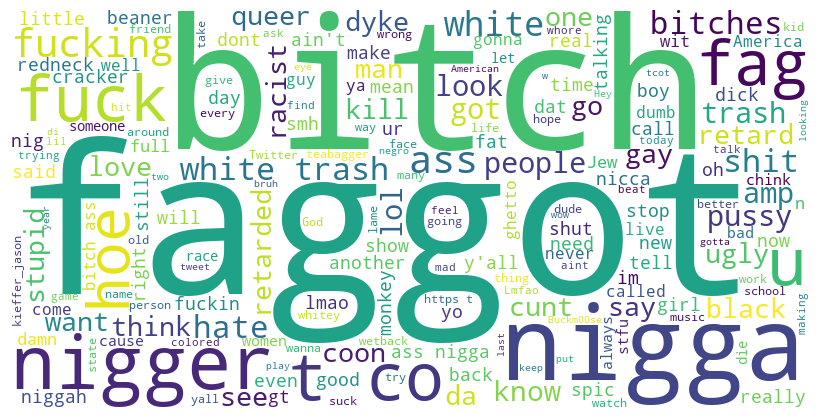

In [56]:
generate_wordcloud(df[df['class'] == 0]['tweet'])

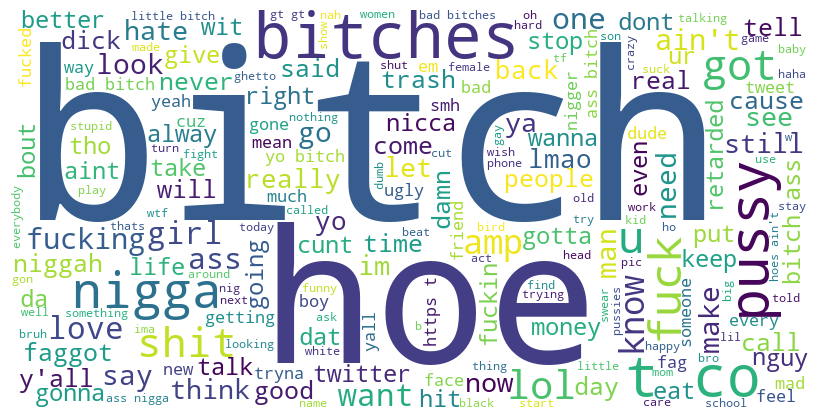

In [57]:
generate_wordcloud(df[df['class'] == 1]['tweet'])

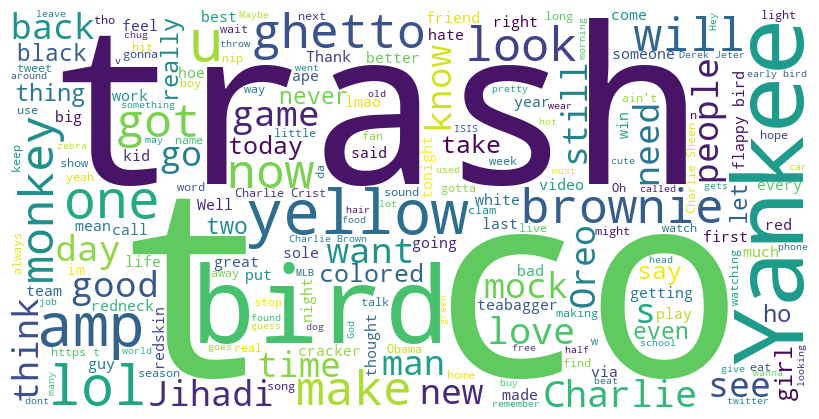

In [61]:
generate_wordcloud(df[df['class'] == 2]['tweet'])

In [48]:
df[df['class'] == 0]['tweet']

85       "@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...
89       "@CB_Baby24: @white_thunduh alsarabsss" hes a ...
110      "@DevilGrimz: @VigxRArts you're fucking gay, b...
184      "@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...
202      "@NoChillPaz: "At least I'm not a nigger" http...
                               ...                        
24576                  this guy is the biggest faggot omfg
24685    which one of these names is more offensive kik...
24751           you a pussy ass nigga and I know it nigga.
24776                                   you're all niggers
24777    you're such a retard i hope you get type 2 dia...
Name: tweet, Length: 1430, dtype: object

In [22]:
#TODO: data preprocessing

# Proposed Solution

Justin To Do

# Evaluation Metrics

In the context of our problem statement, precision is an essential metric because we are highly concerned about minimizing false positives. In this case, a false positive would mean our model wrongly classifies a tweet as hate speech or offensive language, potentially leading to an undeserved ban or flag for the user. This could have significant consequences for the user experience and the overall trust in the platform. Therefore, we aim to maximize the precision of our model.

### Precision

Precision, also known as the positive predictive value, quantifies the model's ability to avoid labeling non-hateful or non-offensive tweets as hateful or offensive. Mathematically, precision is defined as the ratio of true positives (TP) to the sum of true positives and false positives (FP):

Precision = TP / (TP + FP)

Where:
- TP = True Positives: The instances where the model correctly predicted a tweet as hate speech or offensive language.
- FP = False Positives: The instances where the model incorrectly flagged a non-offensive tweet as offensive or hate speech.

The higher the precision, the lower the false positive rate, and the fewer innocent users will get flagged or banned.

For instance, if our model flags 100 tweets as offensive, and 85 of them are indeed offensive, the precision of our model would be 85/100 = 0.85 or 85%. This implies that 85% of the users flagged by the system as offensive were correctly identified.

However, precision alone may not provide the full picture of our model's performance. It does not consider false negatives (actual offensive tweets that the model failed to flag), which are also a concern. To get a more comprehensive understanding, we might consider other metrics like recall or F1 score in conjunction with precision. But given our specific objective of reducing user banning due to misclassification, precision becomes our primary metric.

Thus, while building the model, we aim to maximize precision to ensure that the users are not wrongly flagged or banned due to the misclassification of their tweets as hate speech or offensive language.

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



# Ethics & Privacy

Considering that we are going to classify whether or not a tweet is hateful or offensive, there may be ethical concerns. Firstly, if the classifier were to perform inaccurately it can cause harm to many people. For example, if it classifies a tweet that is not hateful as hateful, then it can impede on someone's freedom of speech. Second, if it classifies a tweet that is hateful that is not hateful, it can damage a person's mental wellbeing. Our team plans to prioritize reducing misses over false alarms in order to protect the mental health of the users at scale. Contrastingly, because the tweets are posted to the public we are not concerned with privacy issues.

# Team Expectations 

* *Our team will communicate in a kind, direct, and respectful manner with each other either over text or in person in all aspects of the project*
* *Our team will equally and fully contribute to all aspects of the project in order to be turned in before the deadline*
* *Our team will be honest in all aspects of the project*
* *On-time attendance is required in each team meeting*
* *In the case of an absence, 24 hour notice of meeting cancellation is required *


# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/9  |  4 PM | NA  | Ideate and choose project, divide and conquer project proposal | 
| 5/17  |  Before 8 PM | Team members complete their assigned parts | Proposal Due  | 
| 5/24  | Before 8 PM  | Team members complete peer review individually | Peer Review Due   |
| 5/30 | 4 PM  | Team members review peer feedback | Start project with feedback, prep data, divide work, complete checkpoint |
| 5/31  | Before 8 PM  | Team members complete their assigned parts| Checkpoint Due |
| 6/5  | 7 PM  | NA | Plan remaining work for training & testing, Divide and Conquer  |
| 6/14  | Before 8 PM  | Team members finish final details | Final Project Due  |

# Footnotes
<a name="brownnote"></a>1.[^](#brown): Brown, Alexander. “What Is so Special about Online (as Compared to Offline) Hate Speech?” Ethnicities, vol. 18, no. 3, 2018, pp. 297–326. JSTOR, https://www.jstor.org/stable/26497929. Accessed 18 May 2023. <br>
<a name="ulgennote"></a>2.[^](#ulgen): Ülgen, Sinan. “FREEDOM OF EXPRESSION ONLINE.” GOVERNING CYBERSPACE: A Road Map for Transatlantic Leadership, Carnegie Endowment for International Peace, 2016, pp. 17–28. JSTOR, http://www.jstor.org/stable/resrep26924.7. Accessed 18 May 2023.<br>
<a name="chatgptnote"></a>3.[^](#chatgpt): ChatGPT, OpenAI. Personal communication for technical assistance, formatting, and provision of sample code. May 2023.

